### Import custom libraries

In [1]:
import image_processing
import data_preparation
import deep_learning
import aux

### Install the required libraries not installed in system

In [11]:
## pandas
if aux.checkLibraryInstalled('pandas') == False:
    !pip install pandas
    
## skicit-leatn
if aux.checkLibraryInstalled('sklearn') == False:
    !pip install -U scikit-learn

## matplotlib
if aux.checkLibraryInstalled('matplotlib') == False:
    !pip install matplotlib

## numpy
if aux.checkLibraryInstalled('numpy') == False:
    !pip install numpy

## yellowBrick
if aux.checkLibraryInstalled('yellowbrick') == False:
    !pip install yellowbrick

## pyts.image
if aux.checkLibraryInstalled('pyts') == False:
    !pip install pyts





pandas
pandas already installed
sklearn
sklearn already installed
matplotlib
matplotlib already installed
numpy
numpy already installed
yellowbrick
yellowbrick already installed
pyts
pyts already installed


### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



### Data Preparation

#### Week consumptions with next_day_cluster

In [8]:
data = pd.read_csv ("../data/previos7.csv",sep=";",header=None)
data = data.iloc[:,1:] 
data.columns = [*data.columns[:-1], 'next_day_cluster']
data

,1,2,3,4,5,6,7,8,9,10,...,160,161,162,163,164,165,166,167,168,next_day_cluster
0,217,167,181,189,204,322,221,247,174,208,...,159,187,186,161,2658,1748,957,421,218,0
1,177,172,184,179,186,271,255,236,328,167,...,184,178,162,412,2938,848,926,1999,415,5
2,168,215,165,181,202,328,313,226,203,190,...,201,179,159,498,1015,757,620,1131,279,5
3,163,208,200,157,202,318,286,563,197,176,...,152,199,195,152,195,335,1105,685,205,5
4,214,202,164,202,151,316,256,145,190,215,...,163,200,197,160,207,200,181,174,193,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,174,169,175,172,152,188,409,336,251,147,...,150,143,119,149,135,131,121,144,149,5
493,192,171,191,194,166,308,1570,1397,196,164,...,145,125,143,151,124,121,172,121,121,5
494,173,149,172,177,148,284,419,1678,711,171,...,147,153,122,153,122,155,148,133,142,5
495,177,172,194,150,171,153,168,424,551,2944,...,127,173,123,157,127,157,146,154,129,5


### Week consumptions without next_day_cluster row

It will be necessary to generate the 2D images for each time series.

In [9]:
data_with_no_next_day_row = data.iloc[: , :-1]

In [10]:
data_with_no_next_day_row

,1,2,3,4,5,6,7,8,9,10,...,159,160,161,162,163,164,165,166,167,168
0,217,167,181,189,204,322,221,247,174,208,...,179,159,187,186,161,2658,1748,957,421,218
1,177,172,184,179,186,271,255,236,328,167,...,174,184,178,162,412,2938,848,926,1999,415
2,168,215,165,181,202,328,313,226,203,190,...,152,201,179,159,498,1015,757,620,1131,279
3,163,208,200,157,202,318,286,563,197,176,...,190,152,199,195,152,195,335,1105,685,205
4,214,202,164,202,151,316,256,145,190,215,...,155,163,200,197,160,207,200,181,174,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,174,169,175,172,152,188,409,336,251,147,...,120,150,143,119,149,135,131,121,144,149
493,192,171,191,194,166,308,1570,1397,196,164,...,147,145,125,143,151,124,121,172,121,121
494,173,149,172,177,148,284,419,1678,711,171,...,124,147,153,122,153,122,155,148,133,142
495,177,172,194,150,171,153,168,424,551,2944,...,158,127,173,123,157,127,157,146,154,129


### Example of hourly consumptions time series for a week of a random consumer

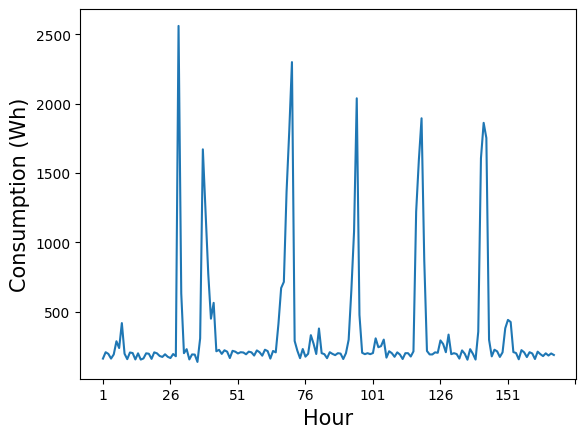

In [7]:
rowFake = data.iloc[: , :-1]
rowTS = (rowFake.iloc[10])
rowTS
aux.plotTimeSeries(rowTS)

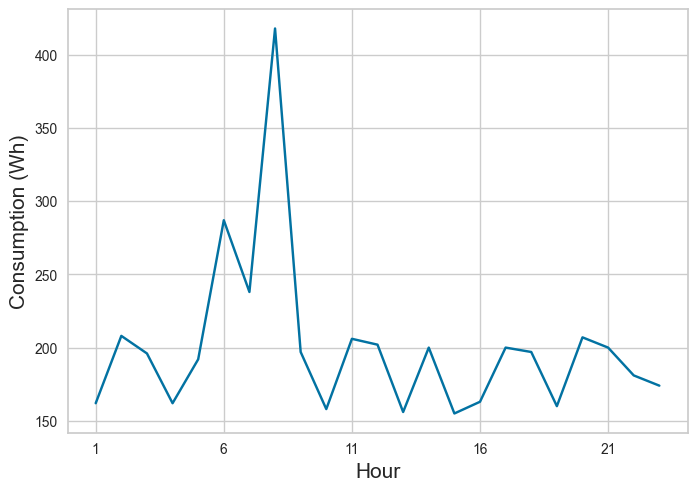

In [15]:
rowFake = data.iloc[: , :-1]
rowTS = (rowFake.iloc[10])
rowTS
aux.plotTimeSeries(rowTS[0:23])

## Imaging Time Series

### Modelling Time series as 2D images